# 1.需要的库

In [108]:
import numpy as np        
from scipy.integrate import solve_ivp              
import matplotlib.pyplot as plt             

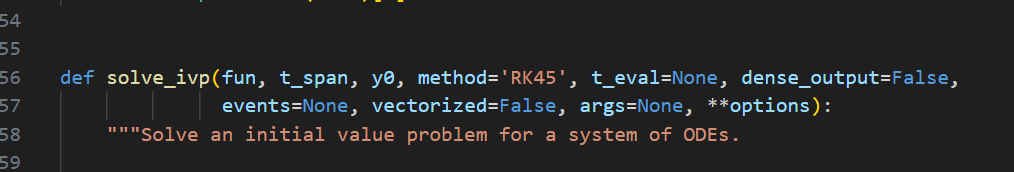

# 2.简单初值问题的建立

## 匀加速直线运动

In [109]:
k = 1
x_0 = [0]

def acceleration_equation(t, x, k):
    x_dot = k*t
    return x_dot

In [110]:
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

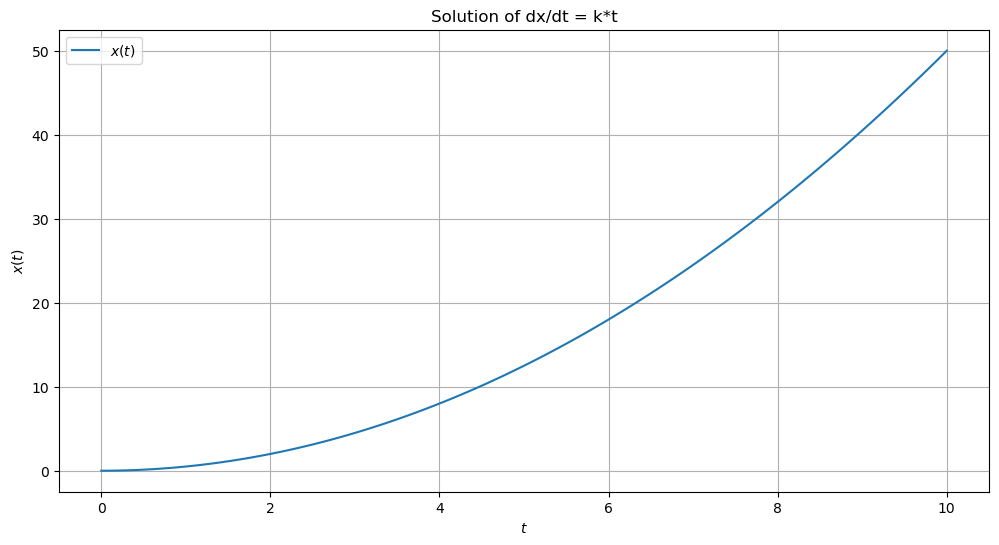

In [111]:
sol = solve_ivp(acceleration_equation, t_span, x_0, args=(k,), t_eval=t_eval)

plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='$x(t)$')
plt.title('Solution of dx/dt = k*t')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend()
plt.grid(True)
plt.show()

## 弹簧振子

In [112]:
x_and_x_dot_initialization_one = [1.0, 2.0]
x_and_x_dot_initialization_two = [2.0, 2.0]
k_one = 1
k_two = 0.5

def harmonic_equation(t, x_and_x_dot, k):
    x, x_dot = x_and_x_dot
    x_ddot = -k*x
    return [x_dot, x_ddot]

In [113]:
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

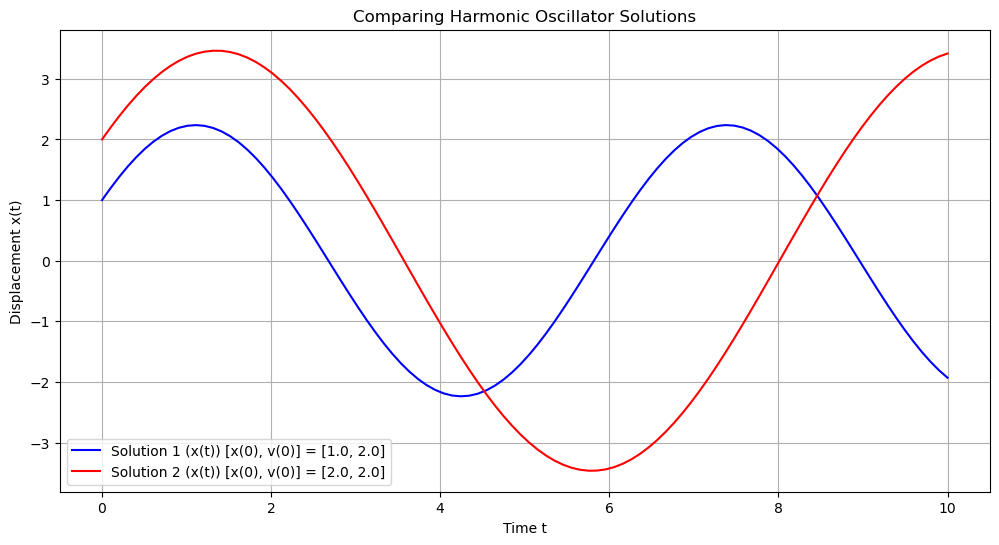

In [114]:
sol_one = solve_ivp(harmonic_equation, t_span, x_and_x_dot_initialization_one, args=(k_one,), t_eval=t_eval)
sol_two = solve_ivp(harmonic_equation, t_span, x_and_x_dot_initialization_two, args=(k_two,), t_eval=t_eval)


plt.figure(figsize=(12, 6))
plt.plot(sol_one.t, sol_one.y[0], label=f'Solution 1 (x(t)) [x(0), v(0)] = {x_and_x_dot_initialization_one}', linestyle='-', color='blue')
plt.plot(sol_two.t, sol_two.y[0], label=f'Solution 2 (x(t)) [x(0), v(0)] = {x_and_x_dot_initialization_two}', linestyle='-', color='red')


plt.title('Comparing Harmonic Oscillator Solutions')
plt.xlabel('Time t')
plt.ylabel('Displacement x(t)')
plt.legend()
plt.grid(True)
plt.show()

## 自由落体碰地反弹，事件监测练习

In [115]:
g = 9.81
e = 0.7
y0 = [10, 0]

def free_fall(t, y):
    y_pos, y_vel = y
    dydt = [y_vel, -g]
    return dydt

In [116]:
t_span = [0, 100]
times = np.array([])
heights = np.array([])
velocity = np.array([])

In [117]:
def hit_ground(t, y):
    return y[0]
hit_ground.terminal = True
hit_ground.direction = -1

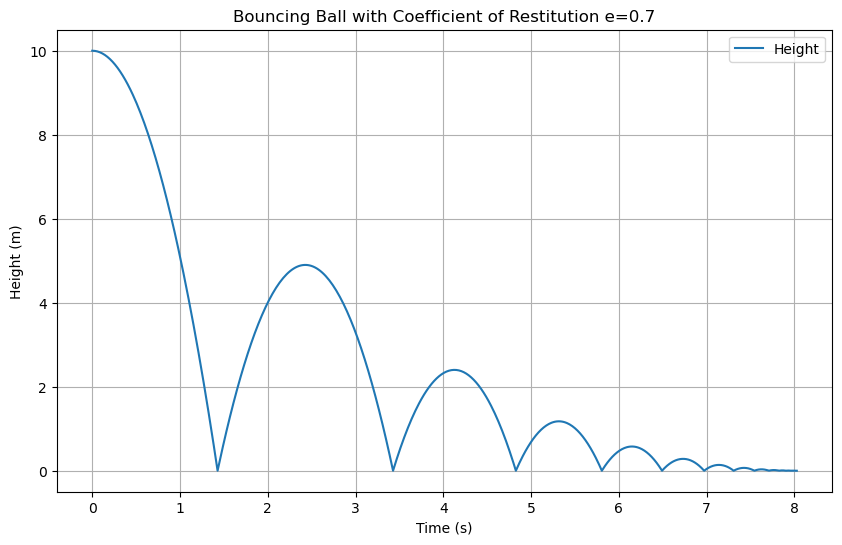

In [118]:
while True:
    sol = solve_ivp(free_fall, t_span, y0, events=hit_ground, dense_output=True, max_step=0.05)
    t = np.linspace(sol.t[0], sol.t[-1], num=100)
    y = sol.sol(t)
    times = np.concatenate((times, t))
    heights = np.concatenate((heights, y[0]))
    velocity = np.concatenate((velocity, y[1]))

    if sol.status == 1:
        new_speed = -e * sol.y[1][-1]
        if abs(new_speed) < 0.1:
            break
        y0 = [0, new_speed]
        t_span[0] = sol.t_events[0][0] + 1e-5
    else:
        break

plt.figure(figsize=(10, 6))
plt.plot(times, heights, label='Height')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title(f'Bouncing Ball with Coefficient of Restitution e={e}')
plt.legend()
plt.grid(True)
plt.show()


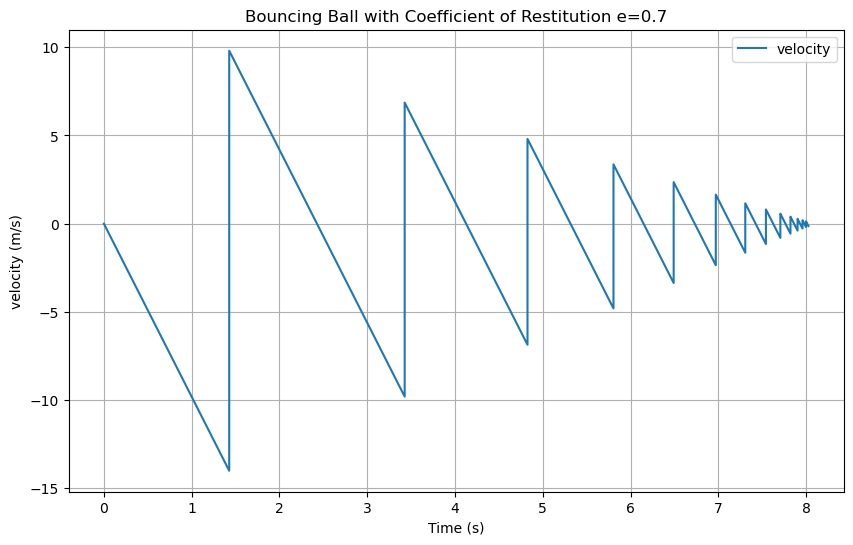

In [119]:

plt.figure(figsize=(10, 6))
plt.plot(times, velocity, label='velocity')
plt.xlabel('Time (s)')
plt.ylabel('velocity (m/s)')
plt.title(f'Bouncing Ball with Coefficient of Restitution e={e}')
plt.legend()
plt.grid(True)
plt.show()
